<a href="https://colab.research.google.com/github/Alisha-Shaikh98/machinelearning/blob/main/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/fcc-forum-pageviews.csv', parse_dates=['date'],index_col='date')
df

,value
date,
2016-05-09,1201.0
2016-05-10,2329.0
2016-05-11,1716.0
2016-05-12,10539.0
2016-05-13,6933.0
...,...
2019-11-30,141161.0
2019-12-01,142918.0
2019-12-02,220144.0


In [7]:
low = df['value'].quantile(0.025)
high = df['value'].quantile(0.975)

df = df[(df['value'] >= low) & (df['value'] <= high)]

In [11]:
def draw_line_plot():
  fig, ax = plt.subplots(figsize=(15,5))
  ax.plot(df.index, df['value'], color='red', linewidth=1)

  #Customizations
  ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  ax.set_xlabel('Date')
  ax.set_ylabel('Page Views')

  return fig

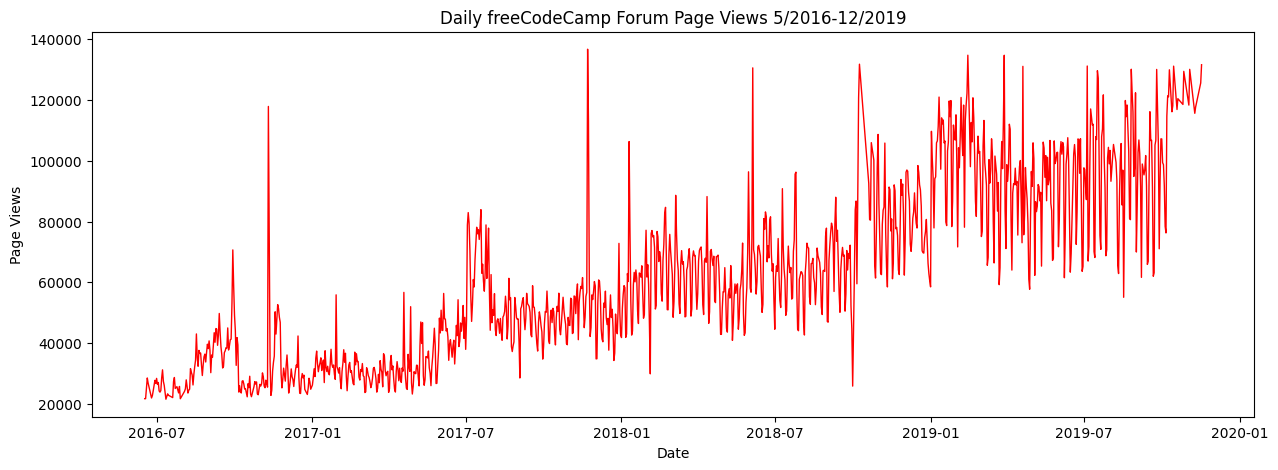

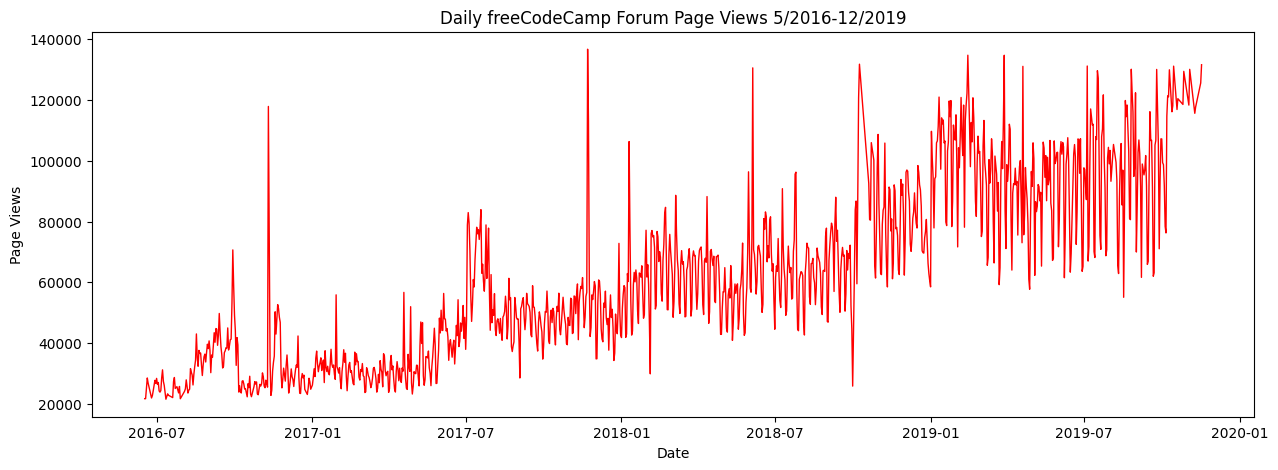

In [12]:
draw_line_plot()

In [17]:
def draw_bar_plot():

  df_bar = df.copy()
  df_bar['year'] = df_bar.index.year
  df_bar['month'] = df_bar.index.month_name()

  #Grouping
  df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

  #Ensuring months in correct order
  months_order = [
      'January', 'February', 'March', 'April', 'May', 'June',
      'July', 'August', 'September', 'October', 'November', 'December'
  ]
  df_grouped = df_grouped[months_order]

  #Plot
  fig = df_grouped.plot(kind='bar', figsize=(15, 10)).figure
  plt.xlabel('Years')
  plt.ylabel('Average Page Views')
  plt.legend(title='Months')
  plt.tight_layout()

  return fig

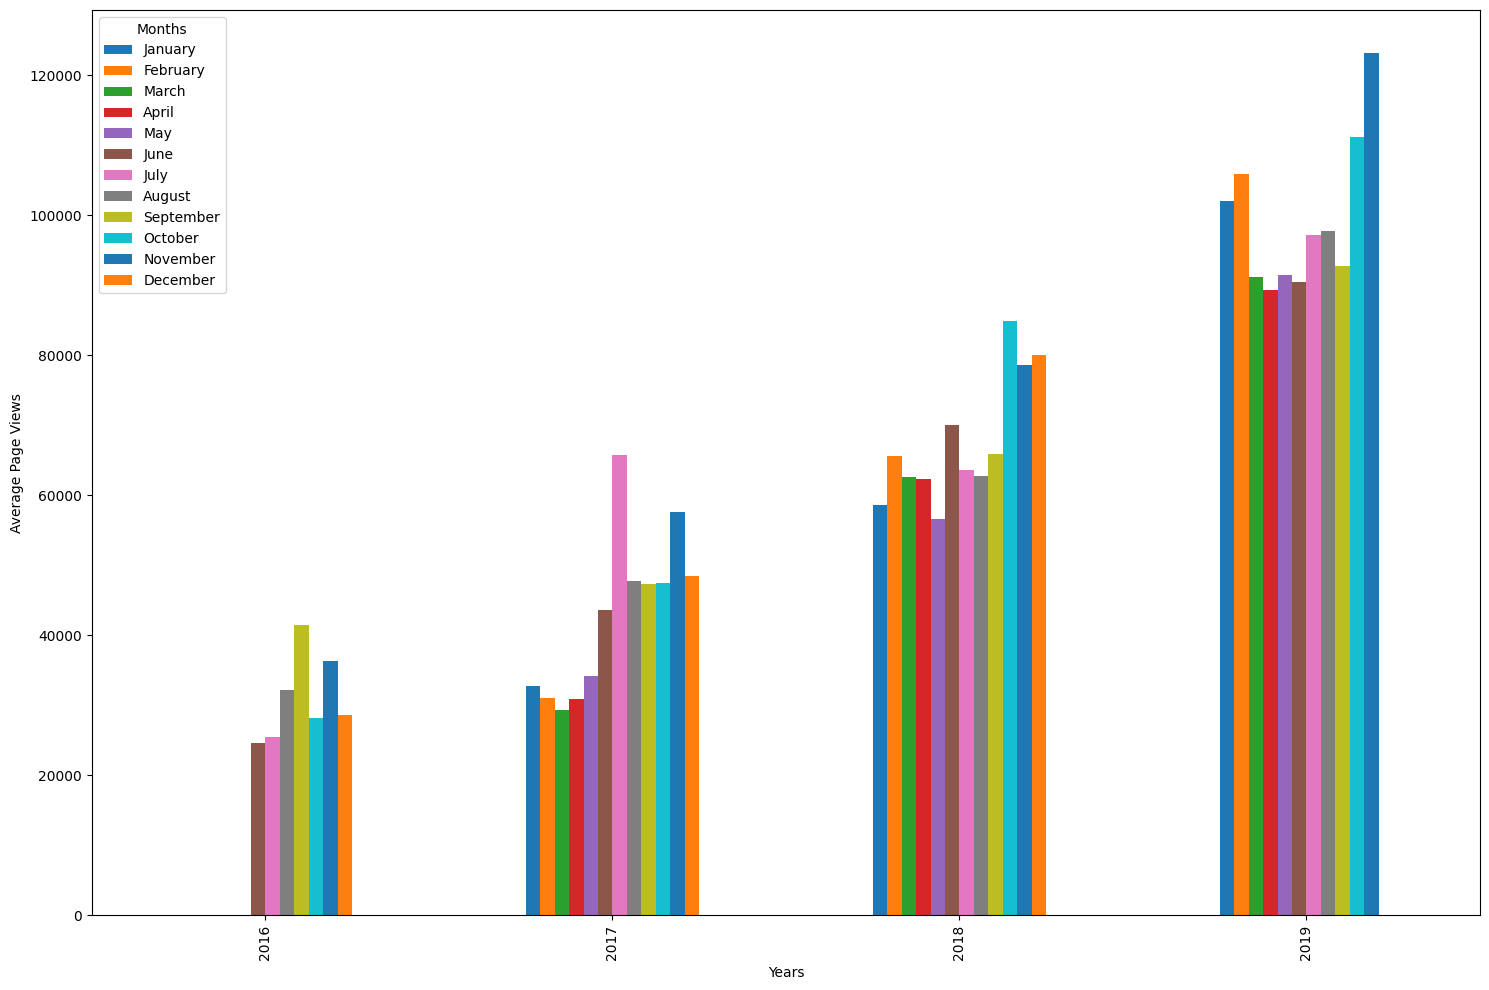

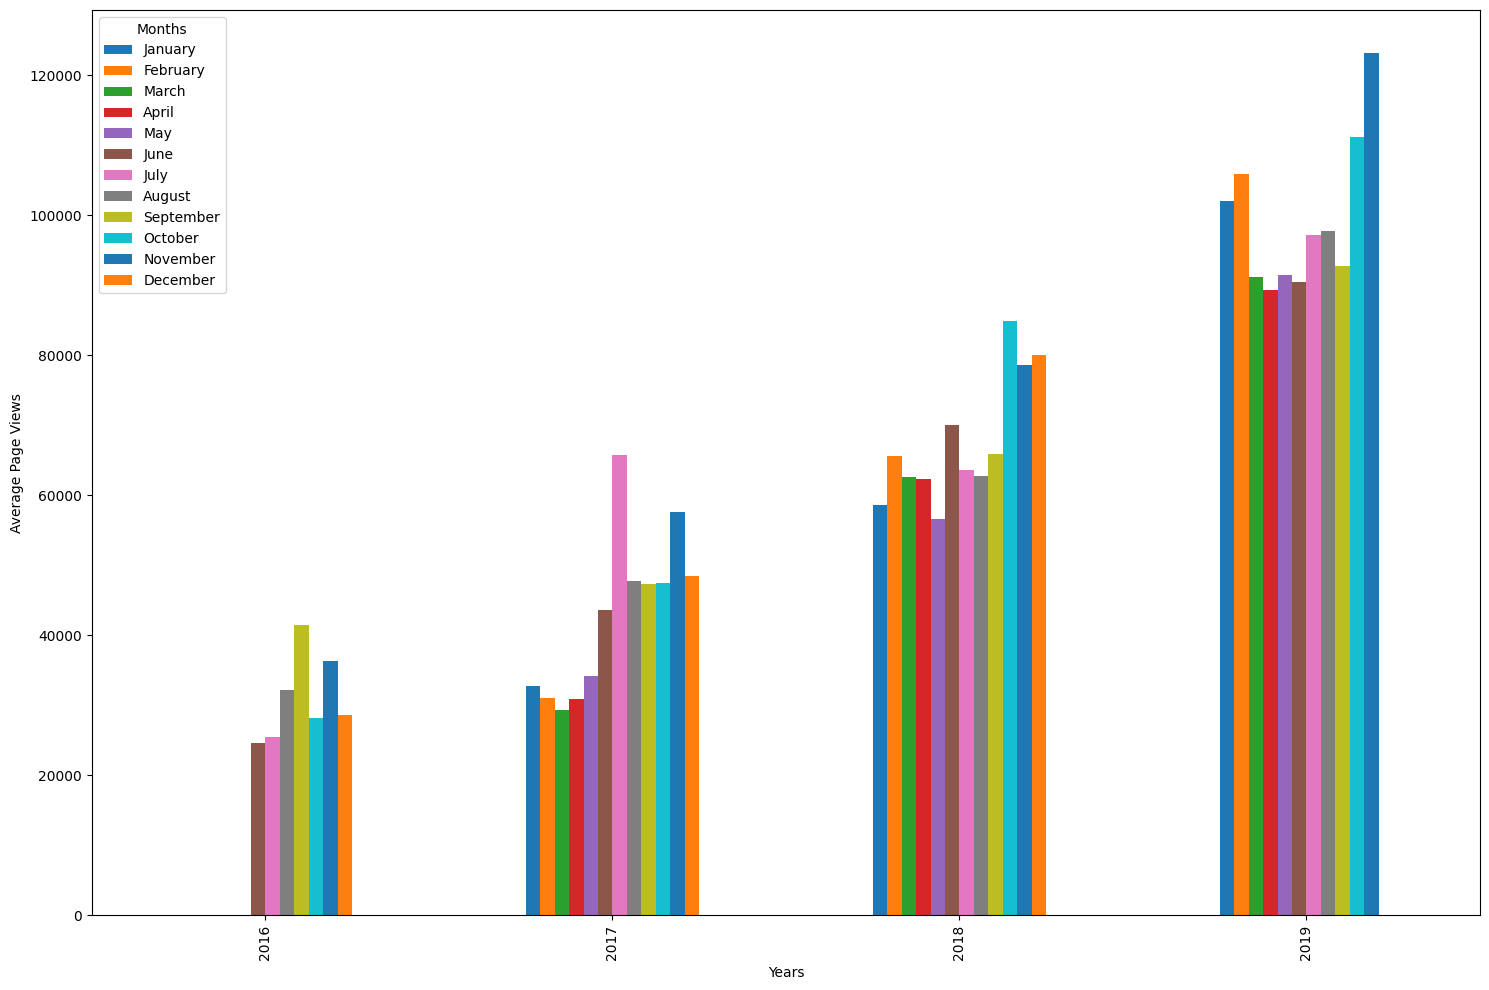

In [19]:
draw_bar_plot()

In [22]:
def draw_box_plot():

  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = df_box['date'].dt.year
  df_box['month'] = df_box['date'].dt.strftime('%b')
  df_box['month_num'] = df_box['date'].dt.month

  #sorting month order
  df_box = df_box.sort_values('month_num')

  fig, axes = plt.subplots(1, 2, figsize=(18,6))

  sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
  axes[0].set_title('Year-wise Box Plot (Trend)')
  axes[0].set_xlabel('Year')
  axes[0].set_ylabel('Page Views')

  sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
  axes[0].set_title('Month-wise Box Plot (Seasonality)')
  axes[0].set_xlabel('Month')
  axes[0].set_ylabel('Page Views')

  return fig


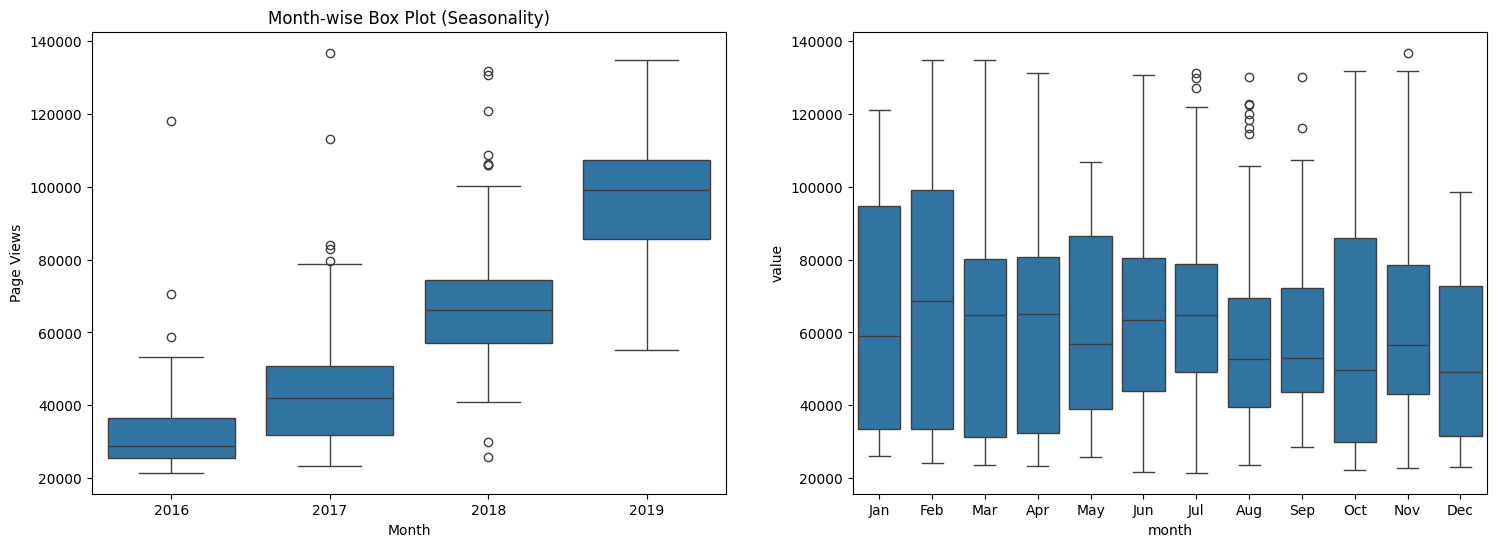

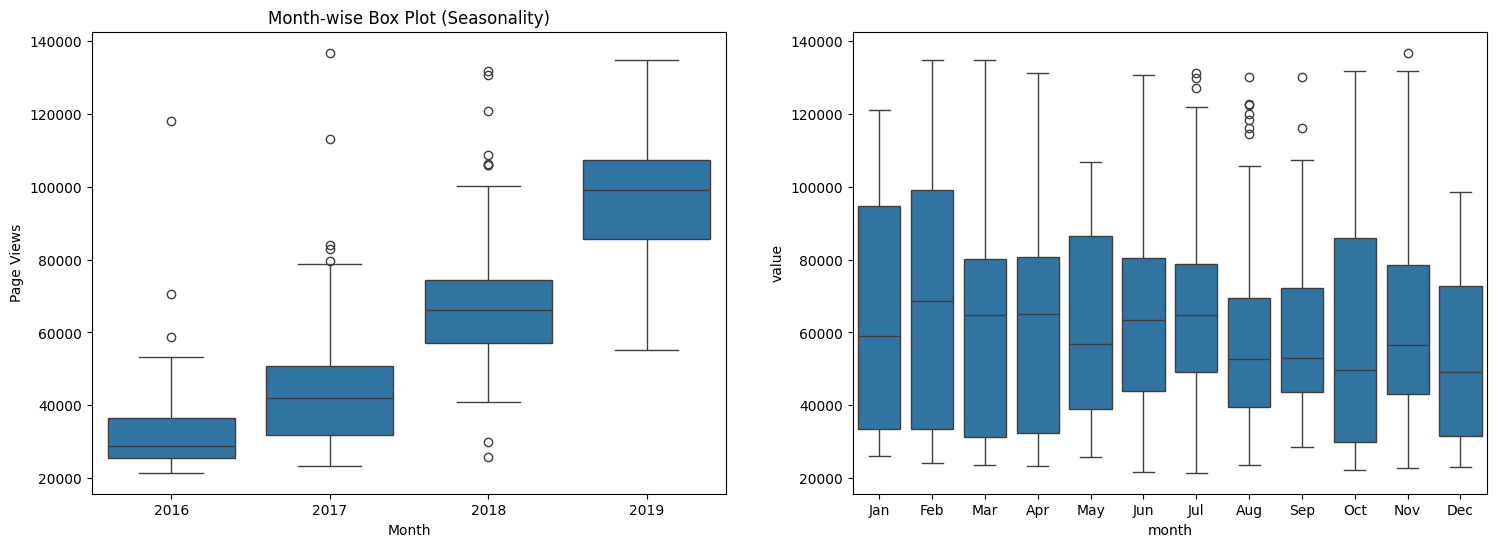

In [23]:
draw_box_plot()